# Time Series Metrics and Resampling

In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt

## Compare Time Series

### Compare the performance of several asset classes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


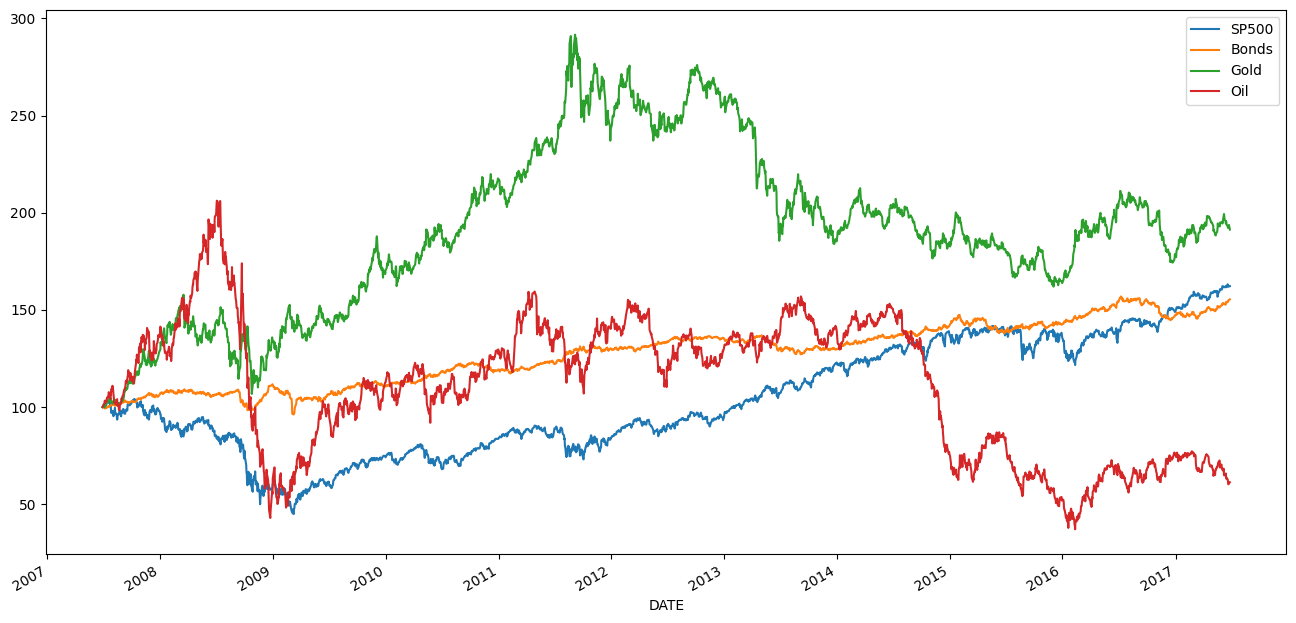

In [10]:
prices = pd.read_csv('../data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select the first price for each series using .iloc[0] on prices and assign the result to first_prices
first_prices = prices.iloc[0]

# Divide prices by first_prices, multiply by 100 and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(figsize=(16,8))
plt.show()

### Compare stock prices with benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


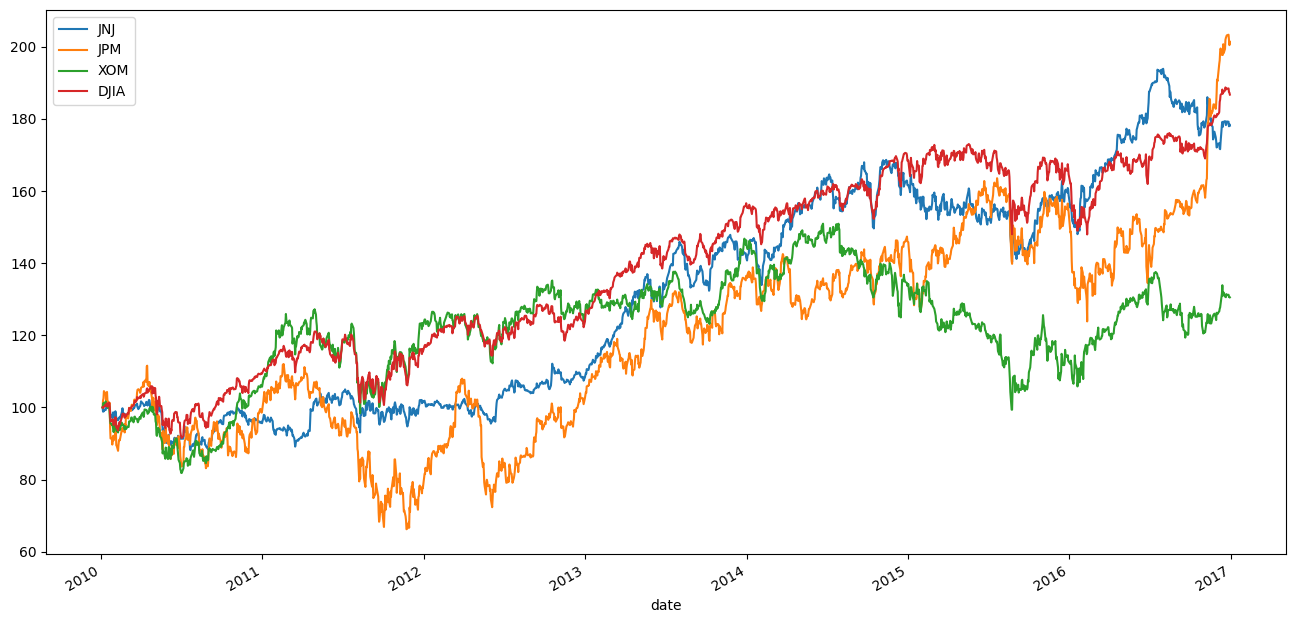

In [16]:
stocks = pd.read_csv('../data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('../data/dow_jones.csv', parse_dates=['date'], index_col='date')

#  Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
data = pd.concat([stocks,dow_jones], axis=1).dropna()
print(data.info())

# Divide data by the first value for each series, multiply by 100 and plot the result.
normalized = data.div(data.iloc[0]).mul(100)
normalized.plot(figsize=(16,8))
plt.show()


### plot performance difference vs benchmark index

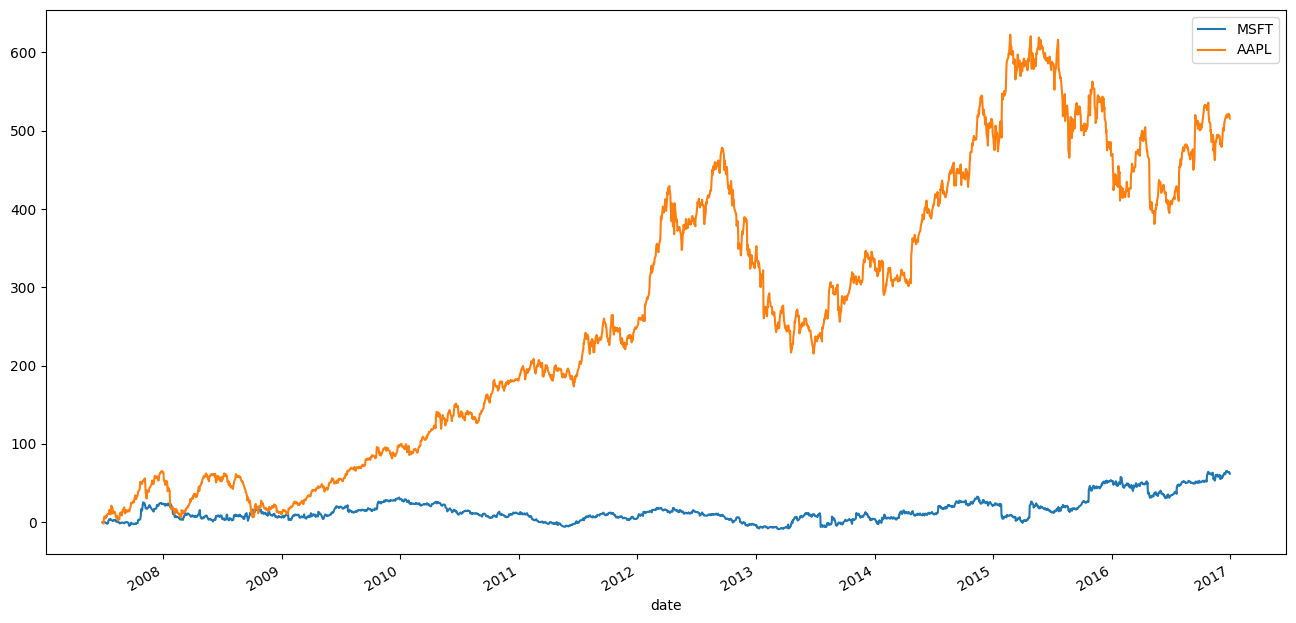

In [23]:
stocks = pd.read_csv('../data/msft_aapl.csv', parse_dates=['date'], index_col='date')
sp500 = pd.read_csv('../data/sp500.csv', parse_dates=['date'], index_col='date')

# Create the list tickers containing the two stock symbols.
tickers = ['MSFT', 'AAPL']

# Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, and assign the result to data.
data = pd.concat([stocks,sp500], axis=1).dropna()

# Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized
normalized = data.div(data.iloc[0]).mul(100)

# Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes, then plot the result.
normalized[tickers].sub(normalized['SP500'], axis=0).plot(figsize=(16,8))
plt.show()

## Resampling

### Convert monthly to weekly data

In [29]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
monthly_dates = pd.date_range(start=start, end=end, freq='ME')

# Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates using pd.date_range with start, end and frequency alias 'W'
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Apply .reindex() to monthly three times: first without additional options, then with bfill and then with ffill, print()-ing each result.
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: ME, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data

            Unemployment
date                    
2010-01-03           NaN
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8


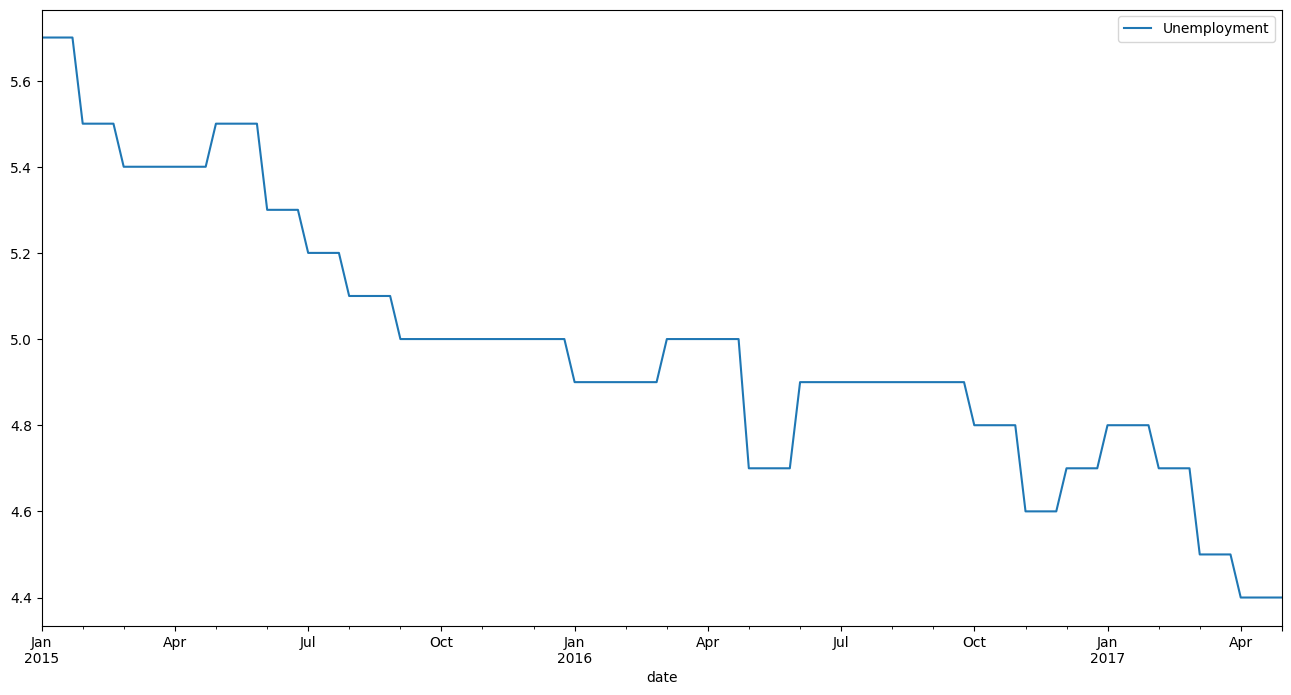

In [40]:
data = pd.read_csv('../data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
data = data[['Unemployment']]
# Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first five rows.
# Show first five rows of weekly series
print(data.asfreq('W').head())

# Convert again to weekly frequency, adding the option 'bfill' and show the first five rows.
print(data.asfreq('W', method='bfill').head())

# Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first five rows.
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_ffill starting in 2015
weekly_ffill.loc['2015':].plot(figsize=(16,8))
plt.show()

## Upsampling

### Use interpolation to create weekly employment data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2015-01-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unemployment  24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes
None


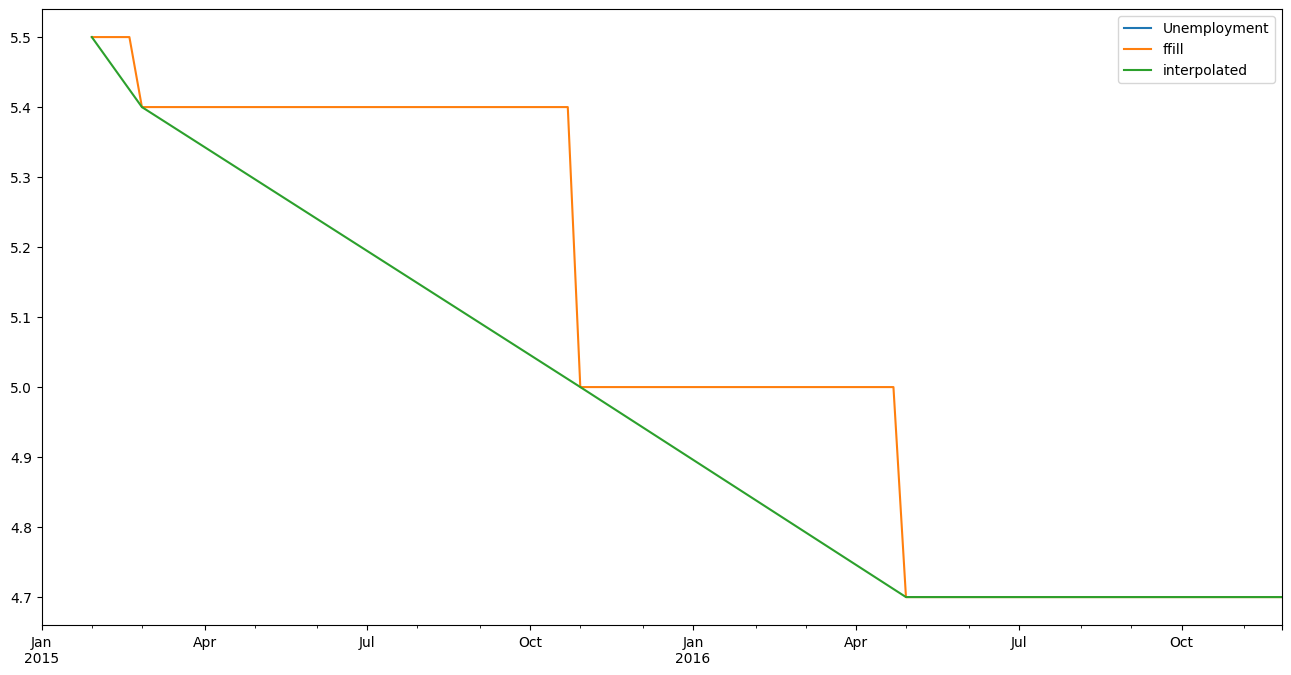

In [48]:
data = pd.read_csv('../data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
monthly = data[['Unemployment']].loc['2015':'2016']

# Inspect monthly using .info()
print(monthly.info())

# CCreate a pd.date_range() with weekly dates, using the .min() and .max() of the index of monthly as start and end, respectively, and assign the result to weekly_dates
weekly_dates = pd.date_range(start=min(monthly.index), end=max(monthly.index), freq='W')

# Apply .reindex() using weekly_dates to monthly and assign the output to weekly.
weekly = monthly.reindex(weekly_dates)

# Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE
weekly['ffill'] = weekly.Unemployment.ffill()
weekly['interpolated'] = weekly.Unemployment.interpolate()

# Plot weekly
weekly.plot(figsize=(16,8))
plt.show()

### Interpolate debt/GDP and compare to unemployment

             Debt/GDP  Unemployment
date                               
2010-01-01   87.00386           9.8
2010-02-01        NaN           9.8
2010-03-01        NaN           9.9
2010-04-01   88.67047           9.9
2010-05-01        NaN           9.6
...               ...           ...
2017-01-01  104.30607           4.8
2017-02-01        NaN           4.7
2017-03-01        NaN           4.5
2017-04-01        NaN           4.4
2017-05-01        NaN           4.3

[89 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


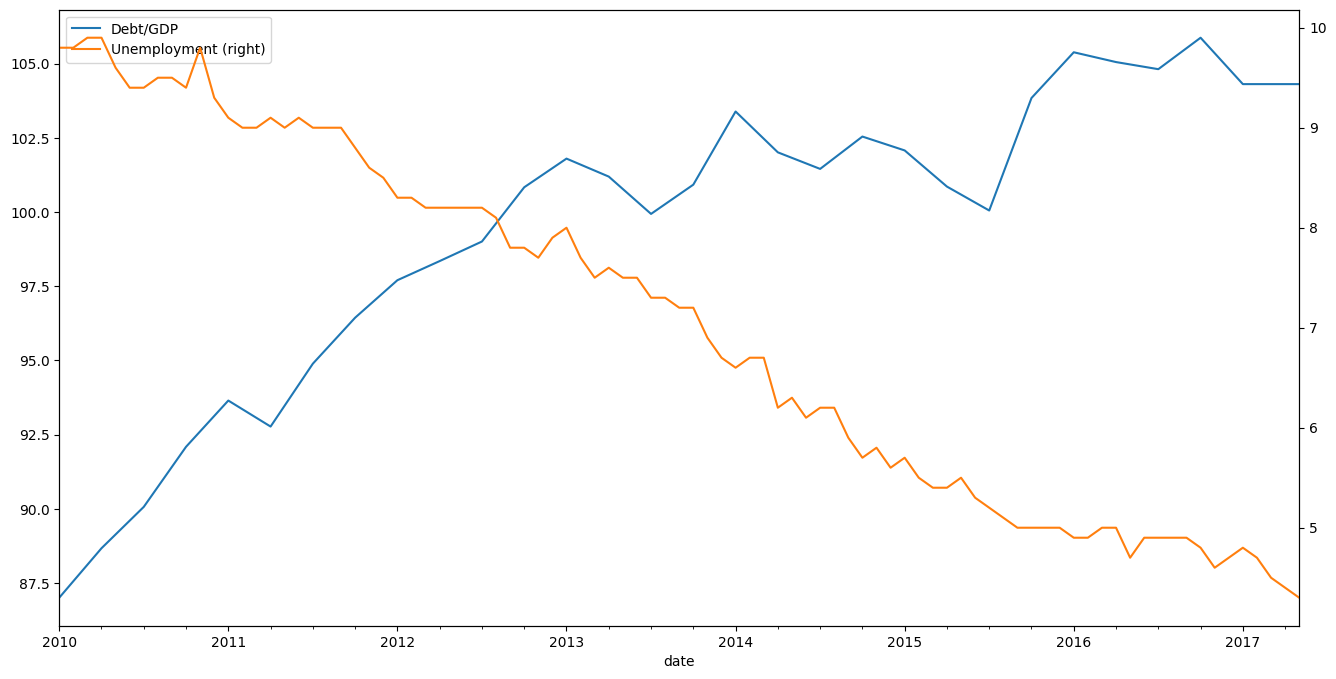

In [54]:
data = pd.read_csv('../data/debt_unemployment.csv', parse_dates=['date'], index_col='date')

# pply .interpolate() to data and assign this to interpolated, then inspect the result.
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment', figsize=(16,8));
plt.show()

## Downsampling and Aggregation

### Compare weekly, monthly and annual ozone trends for NYC & LA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


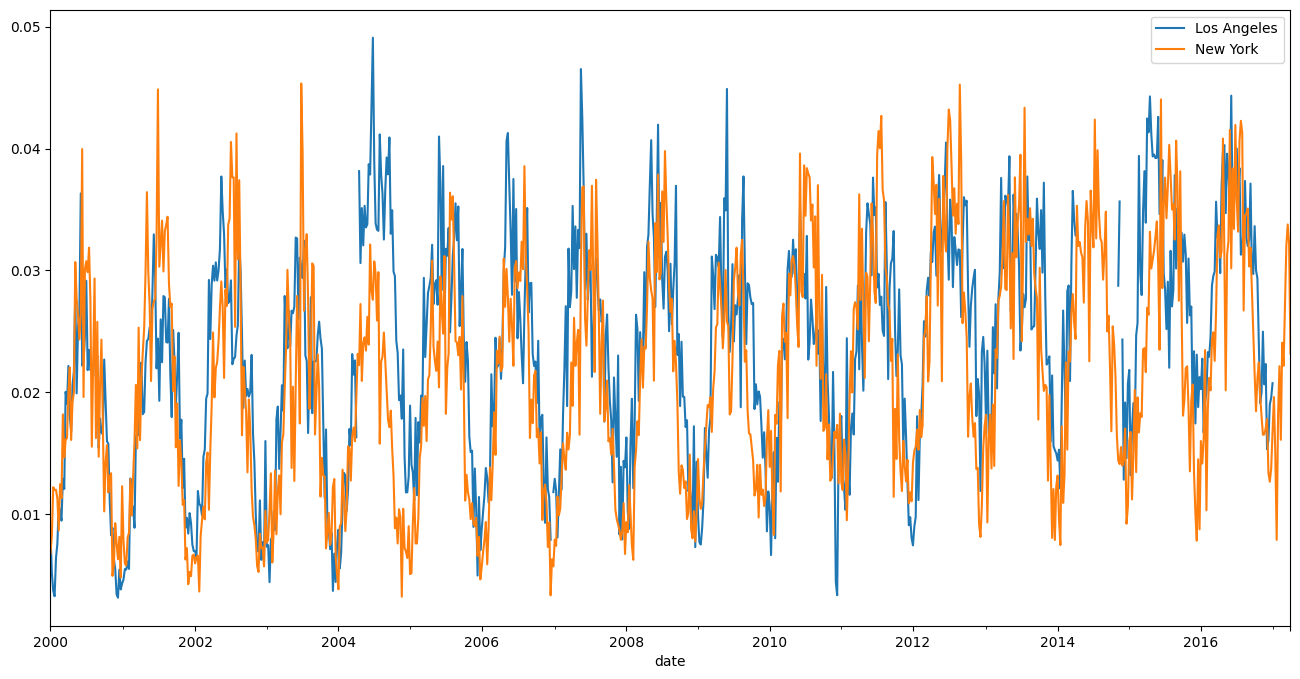

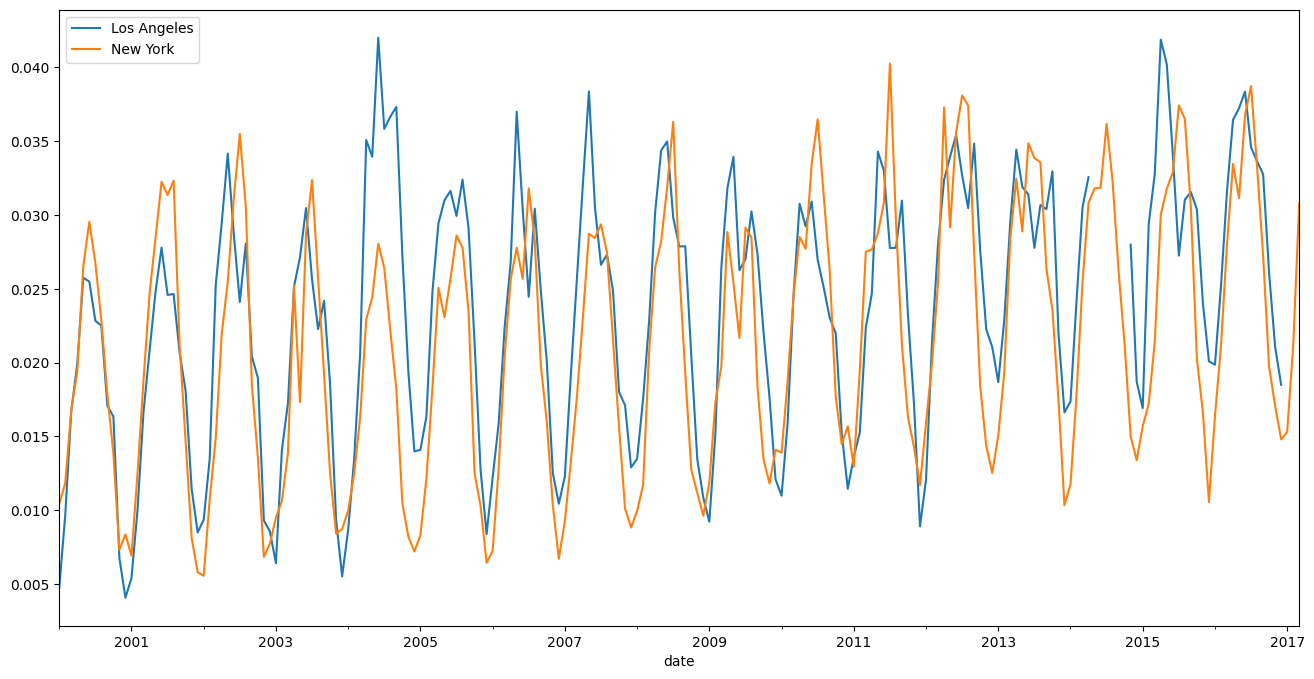

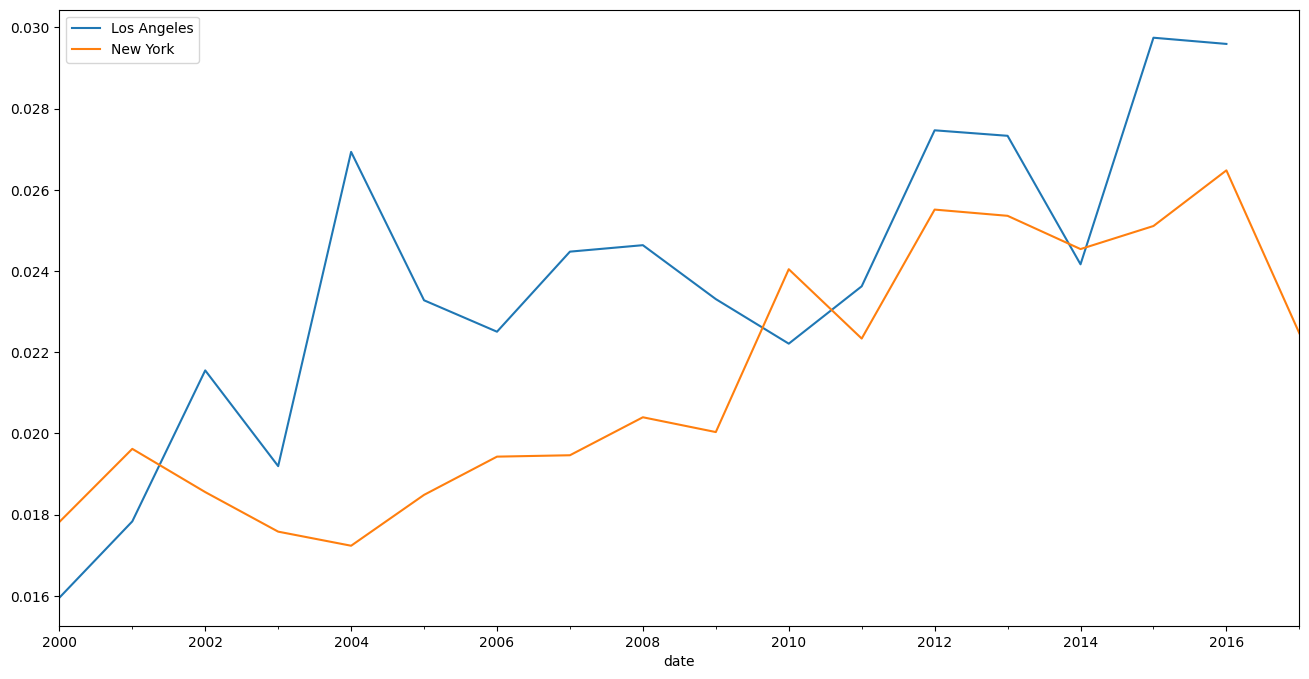

In [61]:
ozone = pd.read_csv('../data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Apply .resample() with weekly frequency ('W') to ozone, aggregate using .mean() and plot the result.
ozone.resample('W').mean().plot(figsize=(16,8))
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('ME').mean().plot(figsize=(16,8))
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('YE').mean().plot(figsize=(16,8))
plt.show()

### Compare monthly average stock prices for Facebook and Google

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


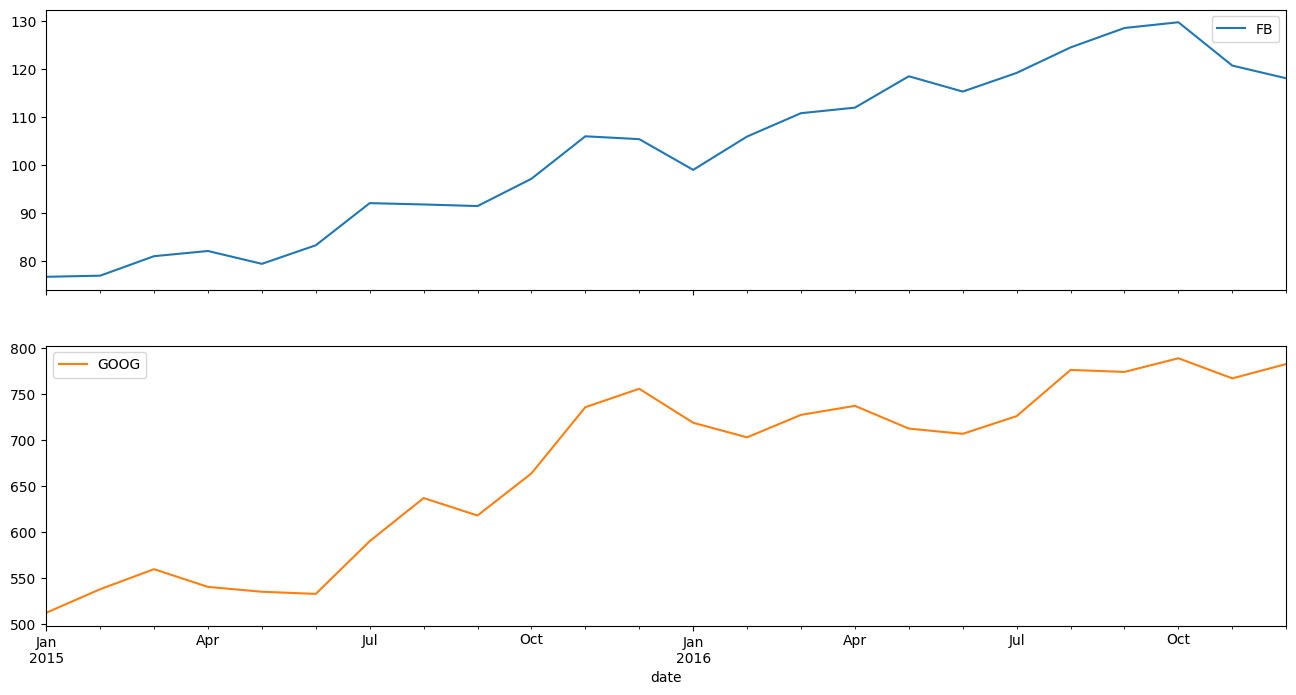

In [64]:
stocks = pd.read_csv('../data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Create monthly_average by applying .resample() with monthly frequency to data, using .mean() to aggregate. Plot the result using subplots
monthly_average = stocks.resample('ME').mean()
monthly_average.plot(subplots=True, figsize=(16,8))
plt.show()

### Compare quarterly GDP growth rate and stock returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


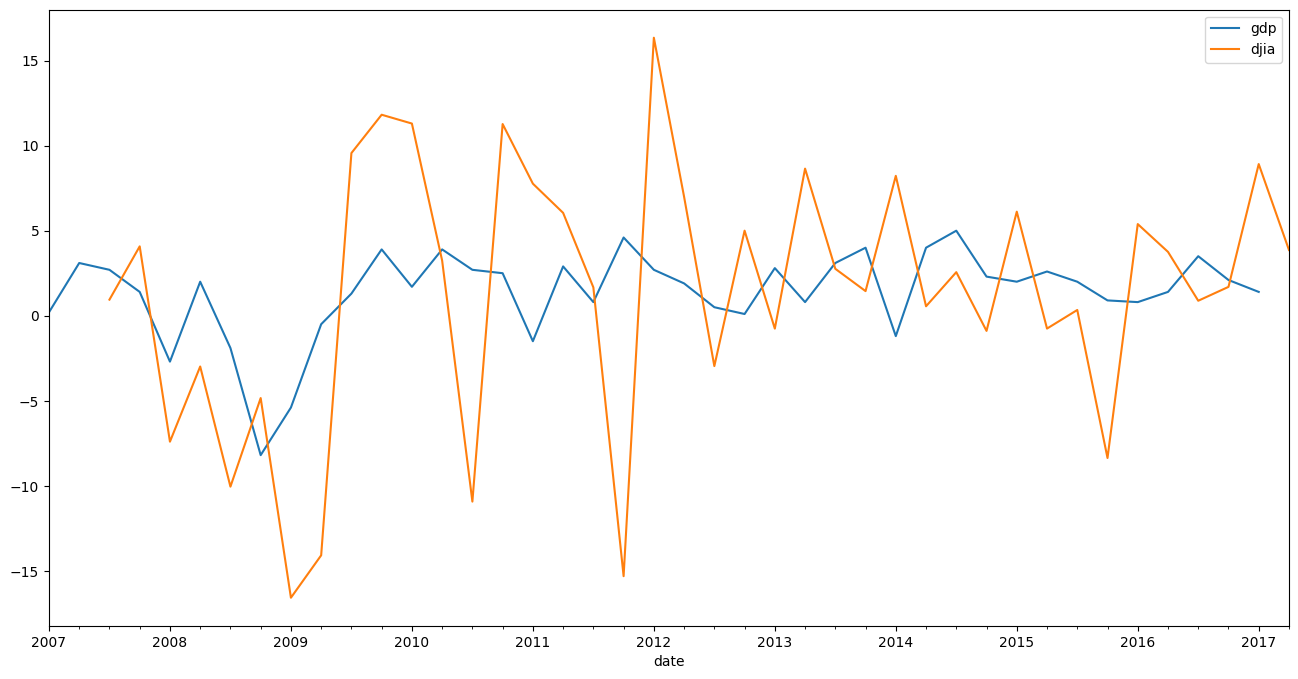

In [68]:
gdp_growth = pd.read_csv('../data/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())
djia = pd.read_csv('../data/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

# Resample djia using frequency alias 'QS', aggregate using .first(), and assign to djia_quarterly.
djia_quarterly = djia.resample('QS').first()

# Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return.
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Use pd.concat() to concatenate gdp_growth and djia_quarterly_return along axis=1, and assign to data. Rename the columns using .columns and the new labels 'gdp' and 'djia', then .plot() the results.
data = pd.concat([gdp_growth,djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot( figsize=(16,8))
plt.show()

### Visualize monthly mean, median and standard deviation of S&P500 returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


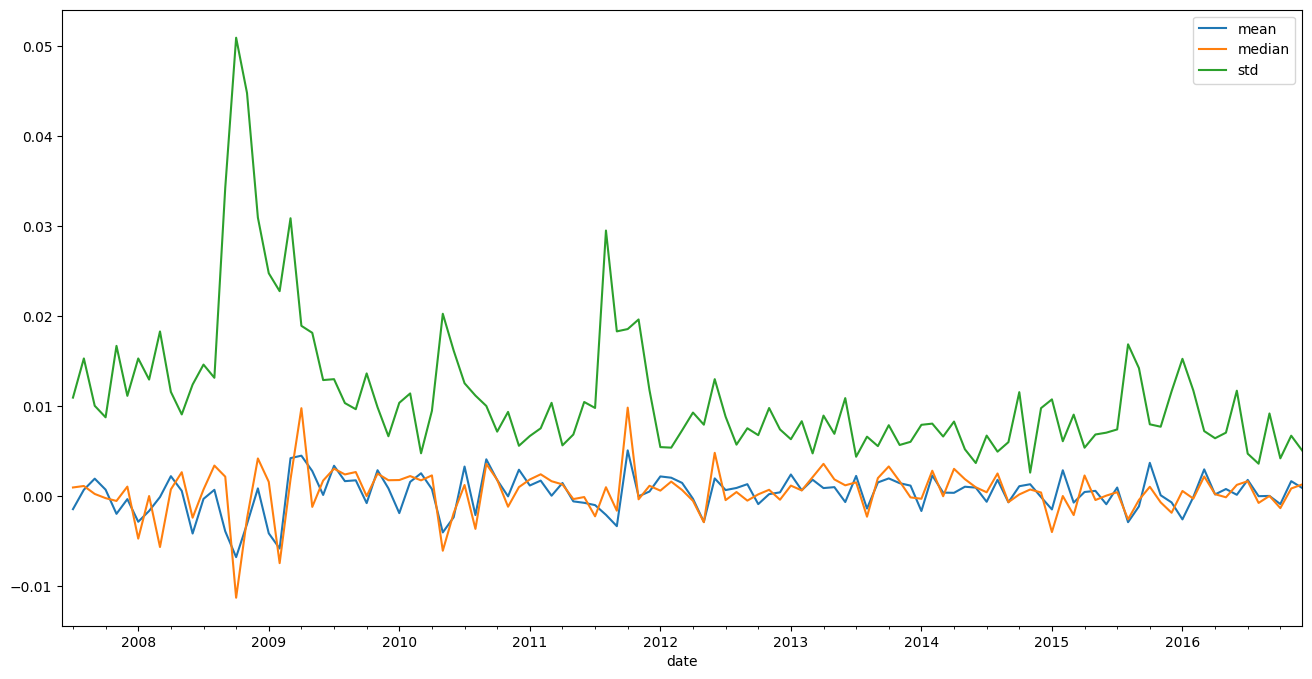

In [71]:
sp500 = pd.read_csv('../data/sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())

# Convert sp500 to a pd.Series() using .squeeze(), and apply .pct_change() to calculate daily_returns.
daily_returns = sp500.squeeze().pct_change()

# .resample() daily_returns to month-end frequency (alias: 'M'), and apply .agg() to calculate 'mean', 'median', and 'std'. Assign the result to stats.
stats = daily_returns.resample('ME').agg(['mean', 'median','std'])

# Plot stats here
stats.plot(figsize=(16,8))
plt.show()